In [1]:
# Packages
from pandas import read_csv, DataFrame
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from numpy import array, mean
from matplotlib.pyplot import savefig, xlim, ylim
from os import makedirs

In [2]:
# Load data and setup output dir
data = read_csv("data/example.csv", sep="\t")
print(data)

makedirs("output", exist_ok=True)

    HouseID    Price  Beds  Baths  Sqft
0         1   550000   2.0    3.0  1245
1         2   295000   2.0    2.0   987
2         3  1400000   4.0    3.0  2806
3         4   510000   2.0    2.0  1138
4         5   680000   2.0    1.0  1040
5         6   799950   3.0    3.0  1954
6         7  1040000   3.0    2.0  2360
7         8   865000   NaN    NaN  2560
8         9   768000   3.0    3.0  1440
9        10  1150000   5.0    2.0  2600
10       11  2220000   4.0    4.0  3590
11       12   700000   2.0    1.0  1580
12       13   975000   3.0    3.0  1300
13       14    25000   1.0    1.0   490
14       15   669000   2.0    2.0   915
15       16   690000   3.0    2.0  1112
16       17   379000   2.0    1.0   930
17       18   424000   1.0    1.0   633
18       19   500000   2.0    2.0   853
19       20   875000   3.0    4.0  1740


In [3]:
# What columns do we care about and what dependent variable col are we trying to predict?
cols = [
    "Price",
    "Beds",
    "Baths",
    "Sqft"
]

dep_col = "Price"

In [4]:
# Drop empty data and split into labels and features
good_data = data[cols].dropna()
labels = array(good_data[dep_col])
features = array(good_data.drop(dep_col, axis=1))

In [5]:
# Split into train and test
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)
print("Training Features Shape:", train_features.shape)
print("Training Labels Shape:", train_labels.shape)
print("Testing Features Shape:", test_features.shape)
print("Testing Labels Shape:", test_labels.shape)

Training Features Shape: (14, 3)
Training Labels Shape: (14,)
Testing Features Shape: (5, 3)
Testing Labels Shape: (5,)


In [6]:
# Fit model
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [7]:
# Check model error
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print("Mean Absolute Error:", round(mean(errors), 2), "degrees.")

Mean Absolute Error: 182347.2 degrees.


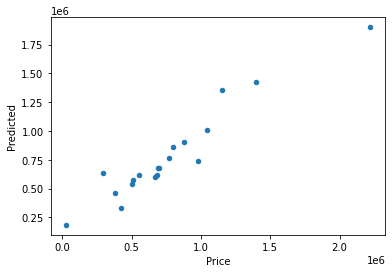

In [8]:
# Plot actual vs. predicted
good_data["Predicted"] = rf.predict(features)
good_data.plot(
    kind="scatter",
    x=dep_col,
    y="Predicted"
)

savefig("output/predicted.png")

In [9]:
# Display importance of each features
importances = list(rf.feature_importances_)
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance
    in zip(list(data[cols].drop(dep_col, axis=1).columns), importances)
]

feature_importances = sorted(feature_importances, reverse=True, key=lambda x: x[1])
for feature, importance in feature_importances:
    print(f"Variable: {feature:20} Importance: {importance}")

Variable: Sqft                 Importance: 0.6
Variable: Beds                 Importance: 0.31
Variable: Baths                Importance: 0.09
